### Imports

In [1]:
import sys
import os
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_colwidth', 400)

ROOT_DIR = os.path.abspath(os.curdir).replace('\\', '/')
ROOT_DIR = ROOT_DIR.replace('examples/notebooks','')
UTILS_DIR = ROOT_DIR + "src/"
sys.path.append(UTILS_DIR)

import canalyst_candas.candas as cd
import canalyst_candas.candas_datareader as cdr
from canalyst_candas.configuration.config import Config


config_info = {
  "canalyst_api_key": "",
   "s3_access_key_id": "",
    "s3_secret_key": "",
  "fred_key": "",
  "default_dir": "",
  "mds_host": "",
  "wp_host": ""
}

config = Config(config=config_info)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

A configuration file has been created for you in 
/Users/jedgore/canalyst/keys.json.


/var/folders/bx/l8mvwb5n4vl9y62rmlthg3y80000gn/T/ipykernel_5644/1432690216.py:33: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# Example: Revenue Mix for One Model
## Workflow:
<li>Set control switches for one ticker
<li>Create ModelSet
<li>Create / Show ModelMap
<li>Show an area chart of Revenue sliced at the "root_distance" node level from the ModelMap

### Control Switches

In [2]:
target_ticker = "SQ US"
return_series = "MO_RIS_REV"
root_distance = 2

### ModelSet

In [3]:
target_modelset = cd.ModelSet(ticker_list=[target_ticker],config=config)

### ModelMap

In [4]:
time_series_name=return_series
model_map = target_modelset.create_model_map(ticker=target_ticker,
                            time_series_name=time_series_name,
                            tree = True,
                            notebook = True,
                            col_for_labels = "time_series_description") #change to time_series_name to see range names
model_map.show()

https://mds.canalyst.com/api/equity-model-series/8MPZ580137/equity-models/FY2021.24/time-series/MO_RIS_REV/forecast-data-points/Q1-2022/drivers/?format=dot


### Area chart

<AxesSubplot:title={'center':'SQ US Revenue Mix'}, xlabel='period_name_sorted'>

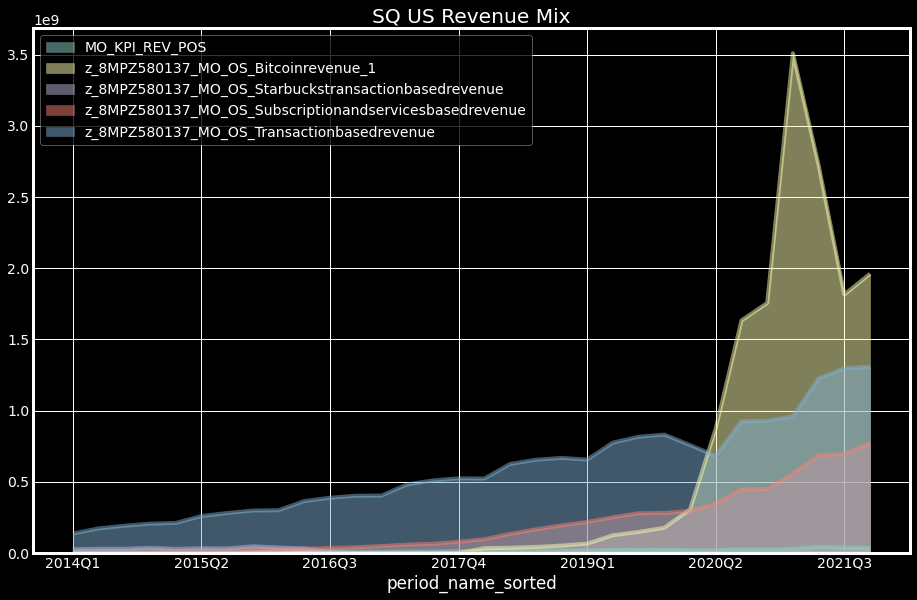

In [9]:
#credit David Braverman of System2 for this idea
node_df = model_map.create_node_df()
node_df["nodes_at_level"] = node_df.groupby("distance_to_root")["time_series_name"].transform("count")
ts_segments = node_df[node_df["distance_to_root"] == root_distance]["time_series_name"].to_list()
df = target_modelset.model_frame(ticker=target_ticker,
                                period_duration_type='fiscal_quarter',
                               time_series_name=ts_segments)

df = cd.unstack_dataframe(df,period_type='period_name_sorted').dropna()
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = [14, 9]
df.plot(x='period_name_sorted',kind='area', stacked=False,title=target_ticker+" Revenue Mix")